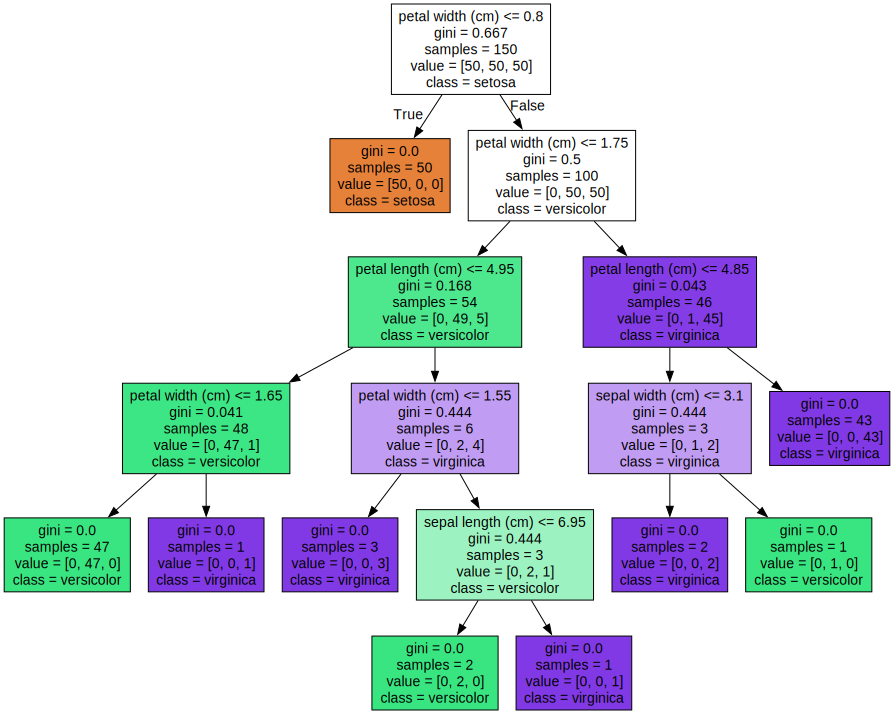

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
import graphviz

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# Decision Tree 모델 생성 및 훈련
clf = DecisionTreeClassifier()
clf.fit(X, y)

# 시각화를 위한 DOT 데이터 생성
dot_data = export_graphviz(clf, out_file="tree.dot", 
                            feature_names=iris.feature_names,  
    
                            class_names=iris.target_names,  
                            filled=True, impurity=True)

# DOT 데이터를 시각화
with open('tree.dot') as f:
    graph = f.read()

graphviz.Source(graph)

C:\Users\USER\AppData\Local\Temp\ipykernel_18604\2901427055.py:33: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


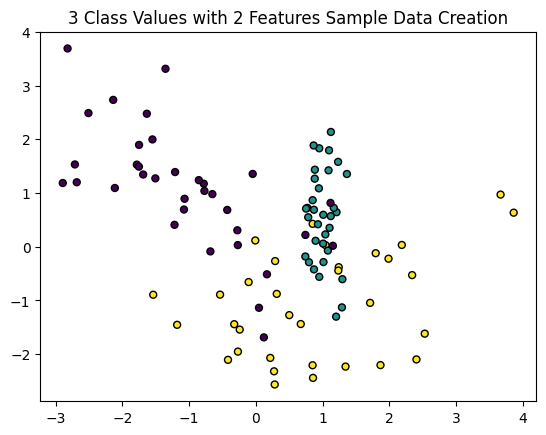

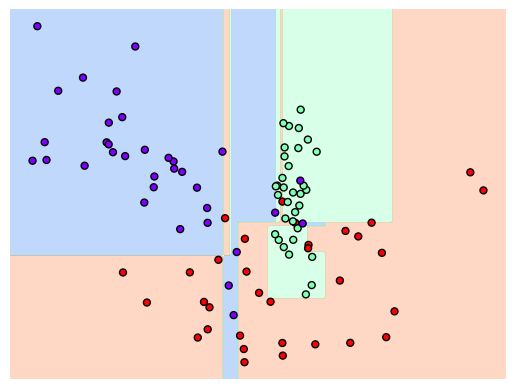

In [4]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class Values with 2 Features Sample Data Creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_feature, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_feature[:, 0], X_feature[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
dt_clf = DecisionTreeClassifier().fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)